In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load data frame
df = pd.read_csv('profiles.csv')

In [3]:
#exploring data

#df.head()
#df.offspring.head()
#df.age.value_counts()

In [4]:
#replaces nans with '0'
df.fillna({'age': 0,
           'diet': 0,
           'drugs': 0,
          'job': 0,
          'offspring': 0,
          'smokes': 0,
           'drinks': 0,
          'income': 0},
          inplace=True)

In [5]:
# check to make sure there's no more nans
#df.isna().any()


In [6]:
#map categorical data interested in

orientation_map = {
                   'straight': 1,
                   'gay': 2,
                   'bisexual': 3}
sex_map = {
           'm': 1,
           'f': 2}
smokes_map = { 
              'no': 1,
              'sometimes': 2, 
              'when drinking': 3,
              'yes': 4,
              'trying to quit': 5}
drugs_map = {
             'never': 1, 
             'sometimes': 2, 
             'often': 3}
drinks_map = {
             'not at all': 1,
             'rarely': 2, 
             'socially': 3,
             'often': 4, 
             'very often': 5, 
             'desperately': 6}
job_map = {
           'other': 1,
           'student': 2,
           'science / tech / engineering': 3,
           'computer / hardware / software': 4,
           'artistic / musical / writer': 5,
           'sales / marketing / biz dev': 6,
           'medicine / health': 7,
           'education / academia': 8,
           'executive / management': 9,
           'banking / financial / real estate': 10,
           'entertainment / media': 11,
           'law / legal services': 12,
           'hospitality / travel': 13,
           'construction / craftsmanship': 14,
          'clerical / administrative': 15, 
          'political / government': 16,
          'rather not say': 17,
          'transportation': 18,
          'unemployed': 19,
          'retired': 20,
          'military': 21}



df['sex_code'] = df.sex.map(sex_map)
df['orientation_code'] = df.orientation.map(orientation_map)
df['smokes_code'] = df.smokes.map(smokes_map)
df['drinks_code'] = df.drinks.map(drinks_map)
df['drugs_code'] = df.drugs.map(drugs_map)
df['job_code'] = df.job.map(job_map)

In [7]:
#create labels to predict
df.loc[df['offspring'] == 'doesn&rsquo;t have kids, but wants them', 'offspring_label'] = 1
df.loc[df['offspring'] == 'wants kids', 'offspring_label'] = 1
df.loc[df['offspring'] == 'has a kid, and wants more', 'offspring_label'] = 1
df.loc[df['offspring'] == 'has kids, and wants more', 'offspring_label'] = 1


df.loc[df['offspring'] == 'doesn&rsquo;t want kids', 'offspring_label'] = 0
df.loc[df['offspring'] == 'doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'offspring_label'] = 0
df.loc[df['offspring'] == 'has kids, but doesn&rsquo;t want more', 'offspring_label'] = 0
df.loc[df['offspring'] == 'has kids, and wants more', 'offspring_label'] = 0


df.offspring_label.value_counts()

0.0    4522
1.0    3861
Name: offspring_label, dtype: int64

In [8]:
df.dropna(axis = 0, subset = ['offspring_label'], inplace = True) 
df.dropna(axis = 0, subset = ['sex_code', 'orientation_code', 'smokes_code', 'drinks_code', 'drugs_code', 'age', 'job_code', 'income'], inplace = True)


In [9]:
#len(df['offspring_label'])

6236

In [10]:
#Visualize Data
#plt.figure(figsize=(8,8))
#plt.hist(df.drinks_code, bins=20)
#plt.xlabel('Drinking')
#plt.ylabel("Amount of People")
#plt.xticks(np.arange(7), ('nan', 'not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'))

#plt.show()



In [11]:
#plt.hist(df.drugs_code, bins=20)
#plt.xlabel('Drugs')
#plt.ylabel("Amount of People")
#plt.xticks(np.arange(4), ('nan', 'never', 'sometimes', 'often'))
#plt.show()

In [12]:
#convert int64 features to str for count vectorizer
df.age = df.age.astype(str)
df.income = df.income.astype(str)

In [14]:

labels = df['offspring_label']

data = df['sex'] + df['orientation'] + df['smokes'] + df['drinks'] + df['drugs'] + df['age'] + df['job'] + df['income']


In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 1)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data, test_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [19]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

In [20]:
#%timeit classifier.fit(train_counts, train_labels)
#%timeit predictions = classifier.predict(test_counts)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('accuracy score = ', str(accuracy_score(test_labels, predictions)))
print('precision score = ', str(precision_score(test_labels, predictions)))
print('recall score = ', str(recall_score(test_labels, predictions)))
print('F1 score = ', str(f1_score(test_labels, predictions)))

accuracy score =  0.6594551282051282
precision score =  0.6203703703703703
recall score =  0.6036036036036037
F1 score =  0.6118721461187215


In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, predictions))

[[488 205]
 [220 335]]


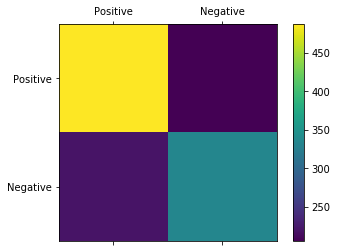

In [23]:
alpha = ['Positive', 'Negative']

matrix = confusion_matrix(test_labels, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()